In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = None


In [2]:
# Parameters
product = {"nb": "/home/jerem/intention1.0/output/domain_mapping_.ipynb"}


# Domain Mapping with MetaLIMEN

In this notebook we'll show how MetaLIMEN embeds domain descriptions into a meta-intention space, computes inter-domain distances, and visualizes their clustering.

In [3]:
import yaml, json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from modules.meta_limen.meta_limen import MetaLIMEN

/home/jerem/intention1.0/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load configuration & instantiate MetaLIMEN

In [4]:
cfg_file = "configs/meta_limen_config.yaml"
ml = MetaLIMEN(cfg_file)
cfg = yaml.safe_load(open(cfg_file))
domains = [d["name"] for d in cfg["target_domains"]]

Loading checkpoint shards:   0%|                                         | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:  25%|████████▎                        | 1/4 [00:00<00:01,  1.96it/s]

Loading checkpoint shards:  50%|████████████████▌                | 2/4 [00:01<00:00,  2.00it/s]

Loading checkpoint shards:  75%|████████████████████████▊        | 3/4 [00:01<00:00,  1.99it/s]

Loading checkpoint shards: 100%|█████████████████████████████████| 4/4 [00:01<00:00,  2.34it/s]

Loading checkpoint shards: 100%|█████████████████████████████████| 4/4 [00:01<00:00,  2.19it/s]

## Define meta-intentions & build DataFrame

In [5]:
intents = ml.define_learning_intentions()
df = pd.DataFrame([{
    "domain": i["domain"],
    **{f"dim{j}": v for j, v in enumerate(i["meta_position"])}
}
 for i in intents])

## Inter-domain Cosine Similarity Heatmap

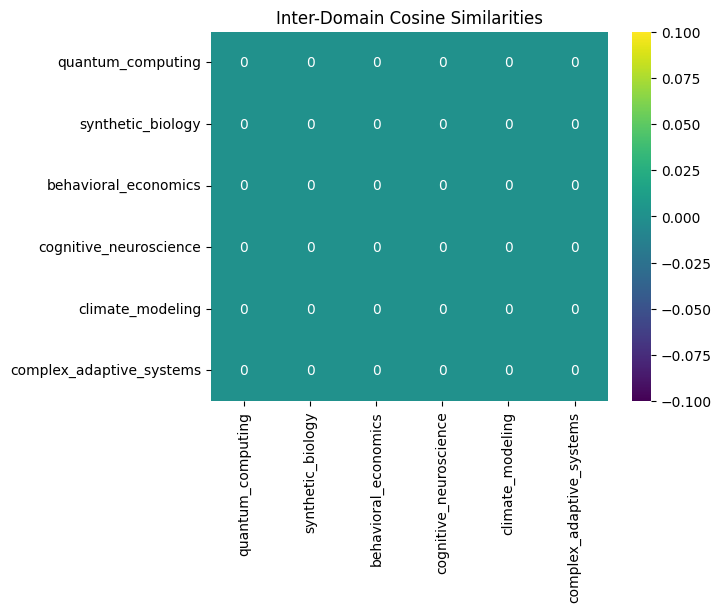

In [6]:
M = cosine_similarity(df.filter(regex='^dim').values)
sns.heatmap(M, xticklabels=df.domain, yticklabels=df.domain, cmap="viridis", annot=True)
plt.title("Inter-Domain Cosine Similarities")
plt.show()

## PCA of Meta-Intentions

/home/jerem/intention1.0/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


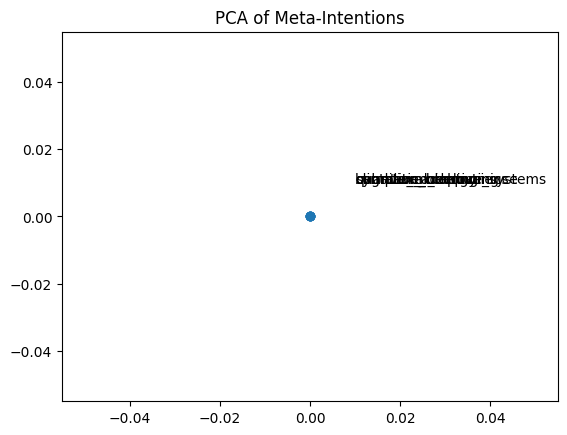

In [7]:
pca_results = PCA(n_components=2).fit_transform(df[[c for c in df if c.startswith("dim")]])
fig, ax = plt.subplots()
ax.scatter(pca_results[:,0], pca_results[:,1])
for x, y, label in zip(pca_results[:,0], pca_results[:,1], df.domain):
    ax.text(x+0.01, y+0.01, label)
ax.set_title("PCA of Meta-Intentions")
plt.show()

## Interpretation

Notice how some domains cluster closer, indicating shared curricular resources or overlapping conceptual space. 